# Results
Analysis:
1. fMRI - two task conditions
2. fMRI - TR level LF HRV, HF HRV and BPM
3. PPI - two ROI with task

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
import nibabel as nb

from pathlib import Path

/home/hw1012/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Task contrast

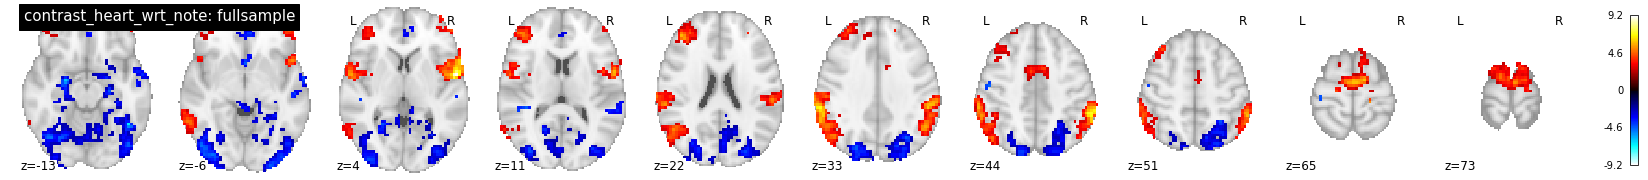

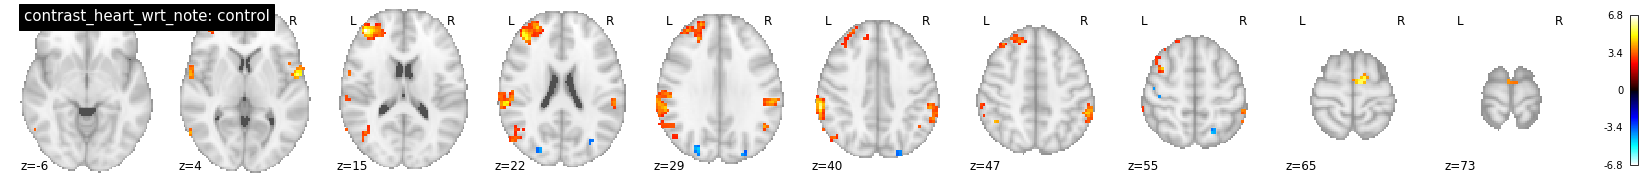

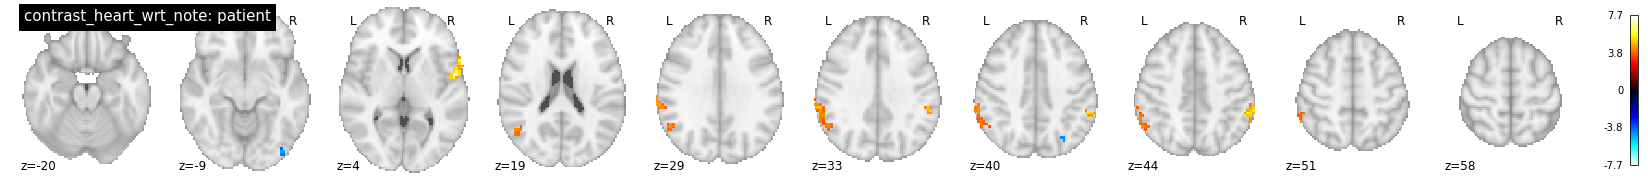

In [28]:
p = 0.05
nii_dir = Path("./glm_niftis")

for g in ["fullsample", "control", "patient", "control_wrt_patients", "patient_wrt_control"]:
    pos = list(nii_dir.glob("FSL_PPI/hammersmith_insula_anterior_inferior_cortex_L/contrast_[^h]*_wrt_[a-z]*"))[0]
    neg = list(nii_dir.glob("FSL_PPI/hammersmith_insula_anterior_inferior_cortex_L/contrast_[^n]*_wrt_[a-z]*"))[0]
    contrast_name = pos.name
    pos_tstat = f"{str(pos)}/{g}_tstat.nii.gz"
    pos_tfce = f"{str(pos)}/{g}_tfce_corrp_tstat.nii.gz"
    neg_tfce = f"{str(neg)}/{g}_tfce_corrp_tstat.nii.gz"
    title = ": ".join([contrast_name, g])     
    mask = np.zeros(nb.load(pos_tfce).shape)
    for path in [pos_tfce, neg_tfce]:
        tfce_nii = nb.load(path)
        mask += (tfce_nii.get_fdata() > (1 - p)).astype(int)
    mask = (mask > 0).astype(int)
    if mask.sum() > 0: # only plot real values
        data = nb.load(pos_tstat).get_fdata() * mask
        sig_tstat = nb.Nifti1Image(data, 
                                   header=tfce_nii.header, 
                                   affine=tfce_nii.affine)
        fig = plotting.plot_stat_map(sig_tstat, 
                                     display_mode="z", cut_coords=10, 
                                     draw_cross=False, title=title)

## Task contrast with CDS state score

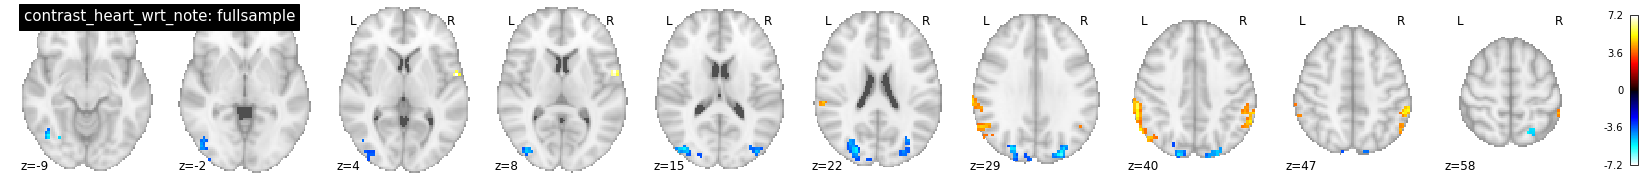

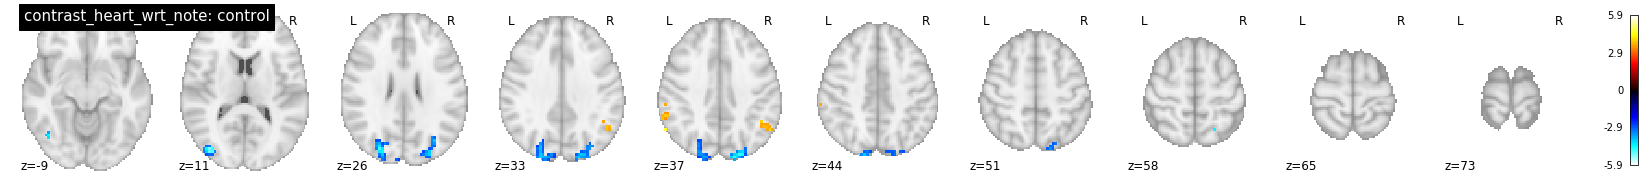

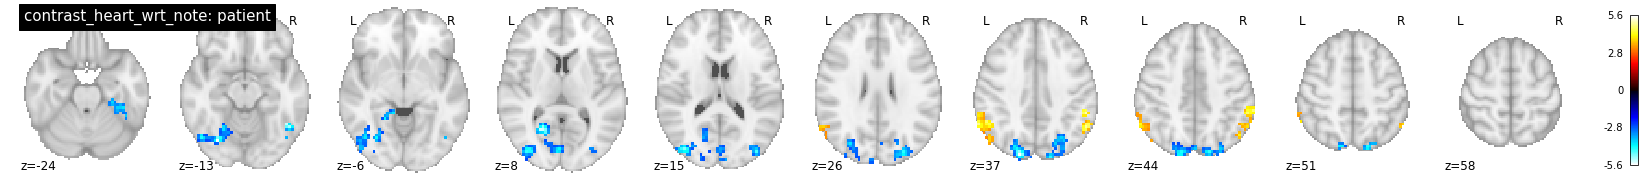

In [29]:
p = 0.05
nii_dir = Path("./glm_niftis")

for g in ["fullsample", "control", "patient", "control_wrt_patients", "patient_wrt_control"]:
    pos = list(nii_dir.glob("FSL_PPI/FSL_PPI-insula_anterior_inferior_cortex_L/contrast_[^h]*_wrt_[a-z]*"))[0]
    neg = list(nii_dir.glob("FSL_PPI/FSL_PPI-insula_anterior_inferior_cortex_L/contrast_[^n]*_wrt_[a-z]*"))[0]
    contrast_name = pos.name
    pos_tstat = f"{str(pos)}/{g}_tstat.nii.gz"
    pos_tfce = f"{str(pos)}/{g}_tfce_corrp_tstat.nii.gz"
    neg_tfce = f"{str(neg)}/{g}_tfce_corrp_tstat.nii.gz"
    title = ": ".join([contrast_name, g])     
    mask = np.zeros(nb.load(pos_tfce).shape)
    for path in [pos_tfce, neg_tfce]:
        tfce_nii = nb.load(path)
        mask += (tfce_nii.get_fdata() > (1 - p)).astype(int)
    mask = (mask > 0).astype(int)
    if mask.sum() > 0: # only plot real values
        data = nb.load(pos_tstat).get_fdata() * mask
        sig_tstat = nb.Nifti1Image(data, 
                                   header=tfce_nii.header, 
                                   affine=tfce_nii.affine)
        fig = plotting.plot_stat_map(sig_tstat, 
                                     display_mode="z", cut_coords=10, 
                                     draw_cross=False, title=title)

## PPI - no CDS state

insula middle short gyrus R: contrast_seed_int_heart_wrt_note: control
insula middle short gyrus L: contrast_seed_int_heart_wrt_note: control
insula anterior inferior cortex R: contrast_seed_int_heart_wrt_note: control_wrt_patients
insula anterior inferior cortex R: contrast_seed_int_note_wrt_heart: patient_wrt_control
insula anterior short gyrus L: contrast_seed_int_heart_wrt_note: control_wrt_patients
insula anterior short gyrus L: contrast_seed_int_note_wrt_heart: patient_wrt_control
insula anterior short gyrus R: contrast_seed_int_heart_wrt_note: control_wrt_patients
insula anterior short gyrus R: contrast_seed_int_note_wrt_heart: patient_wrt_control


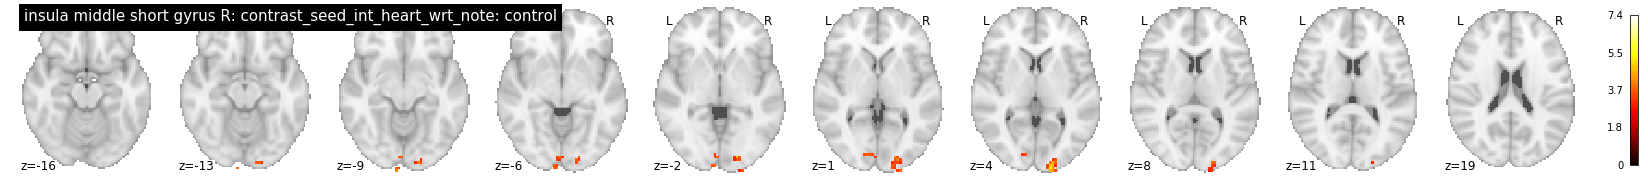

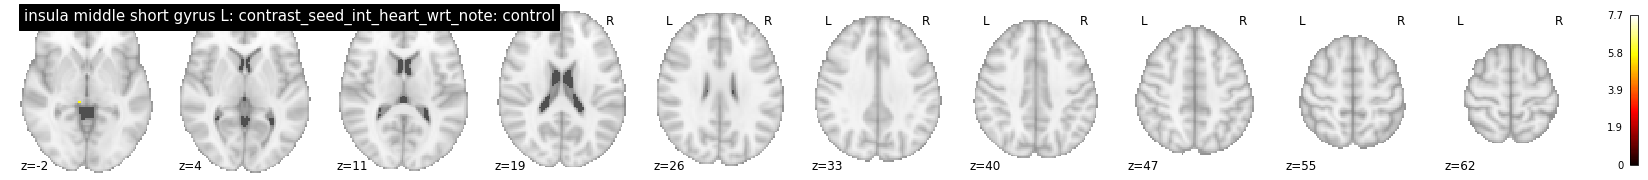

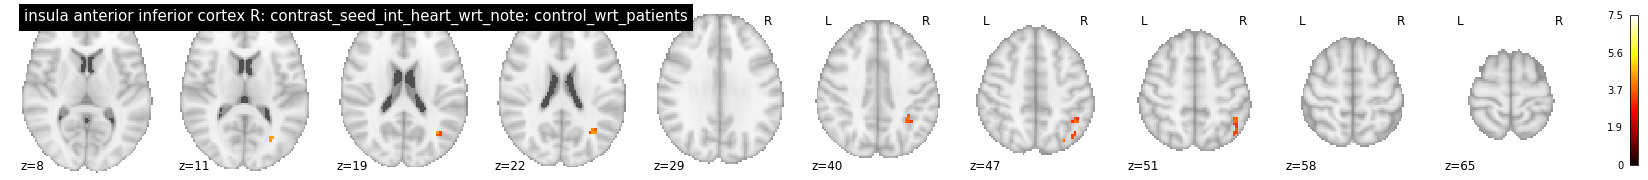

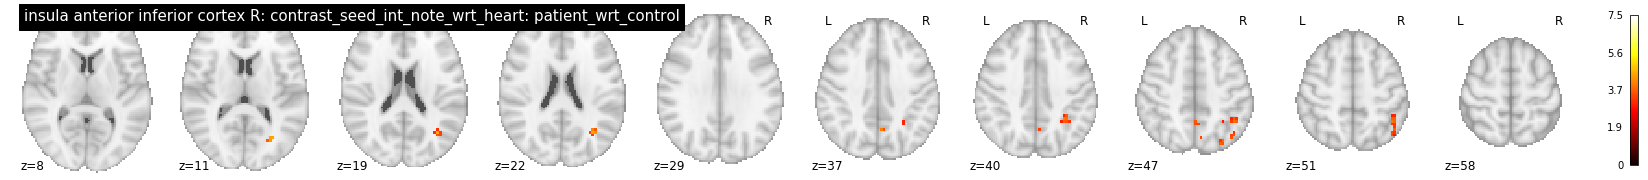

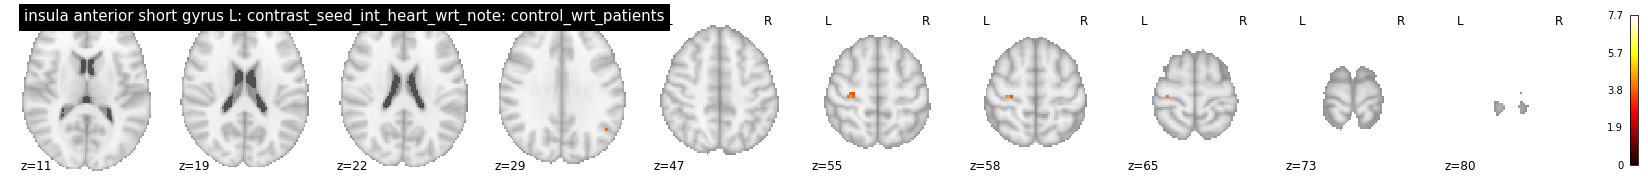

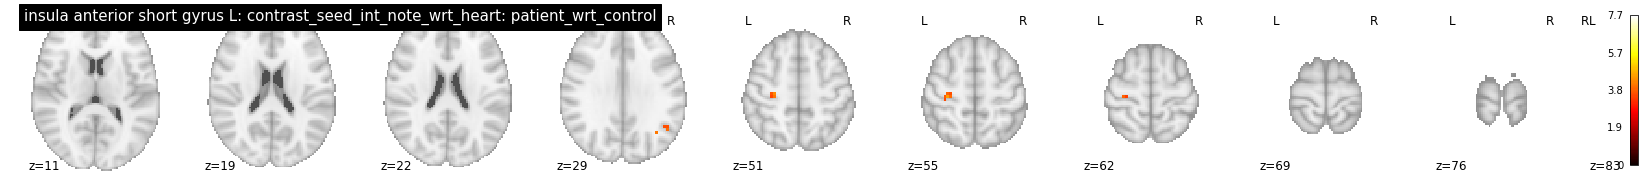

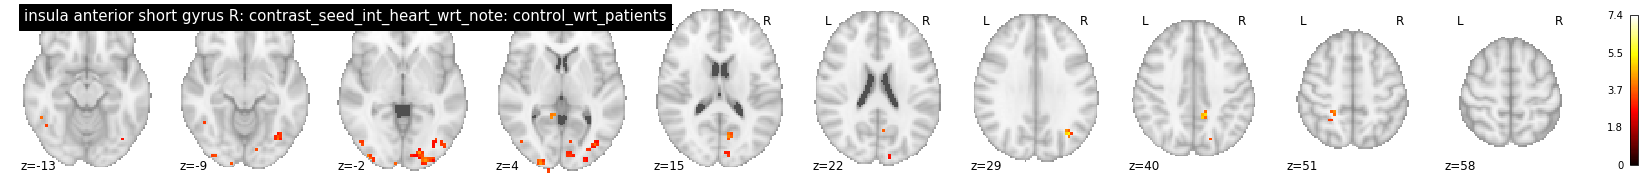

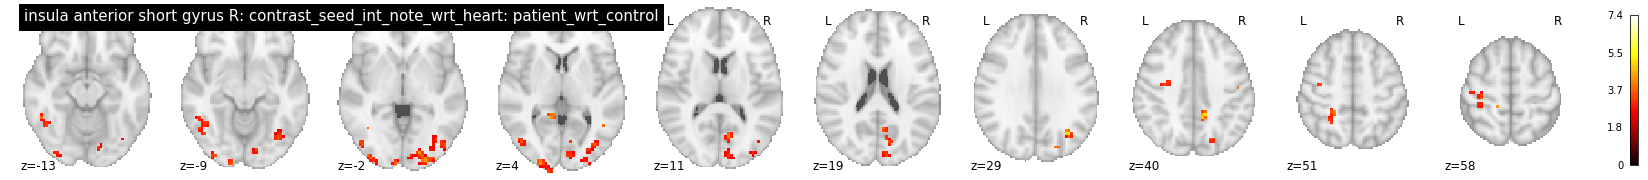

In [36]:
p = 0.05
nii_dir = Path("./glm_niftis")
seed_dir = Path("../references/insular_masks")

for c in list(nii_dir.glob("FSL_PPI/hammersmith_insula*/*")):
    seed_name = " ".join(str(c.parent).split("_")[3:])
    contrast_name = c.name
    if "seed_int" in contrast_name:
        for g in ["fullsample", "control", "patient", "control_wrt_patients", "patient_wrt_control",]:
            tstat = f"{str(c)}/{g}_tstat.nii.gz"
            tfce = f"{str(c)}/{g}_tfce_corrp_tstat.nii.gz"
            title = ": ".join([seed_name, contrast_name, g])        

            tfce_nii = nb.load(tfce)
            mask = tfce_nii.get_fdata() > (1 - p)
            sig = tfce_nii.get_fdata().max()
            vmax = nb.load(tstat).get_fdata().max()
            data = nb.load(tstat).get_fdata() * mask
            if mask.sum() > 0: # only plot real values
                sig_tstat = nb.Nifti1Image(data, 
                                           header=tfce_nii.header, 
                                           affine=tfce_nii.affine)
                fig = plotting.plot_stat_map(sig_tstat, vmax=vmax+2, 
                                             display_mode="z", cut_coords=10, 
                                             draw_cross=False, title=title)
                print(title)

### With CDS state score

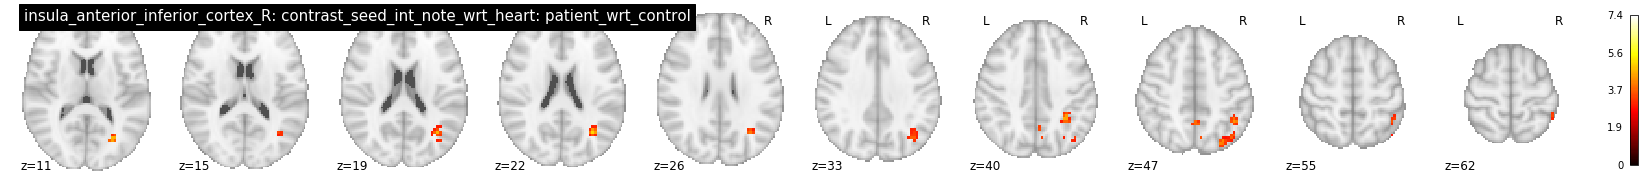

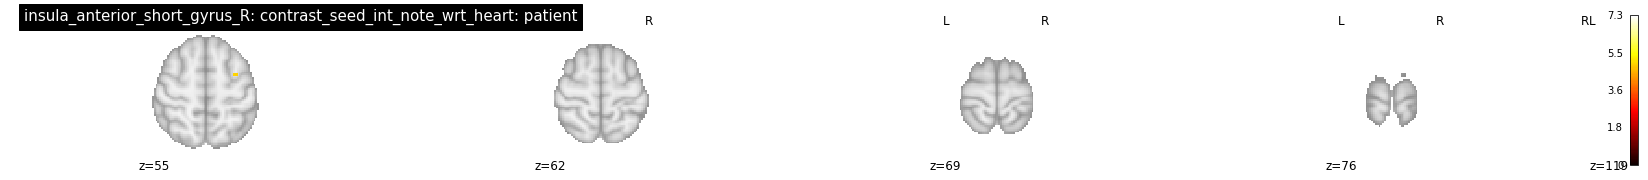

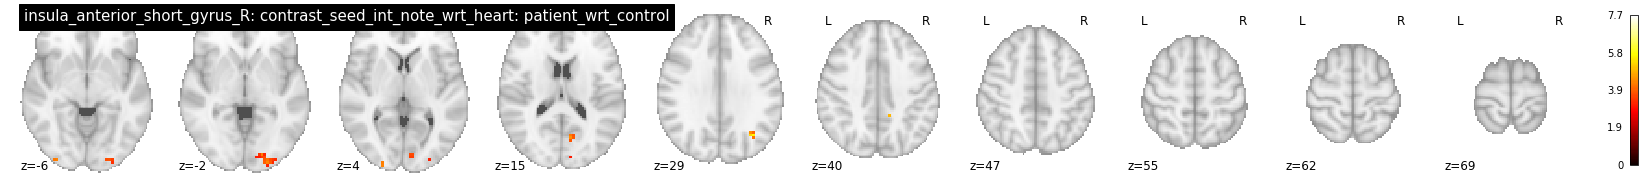

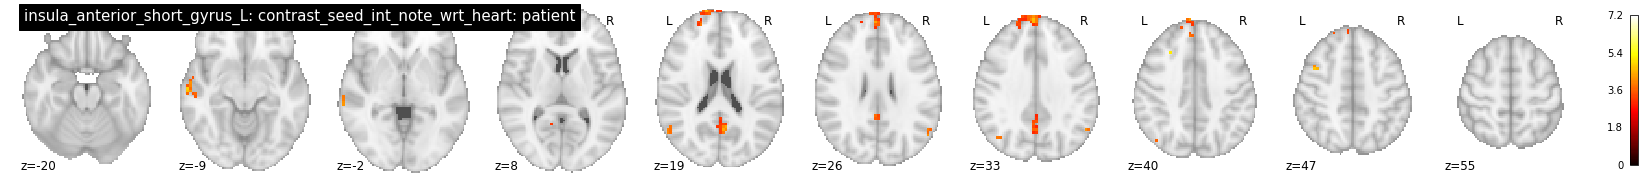

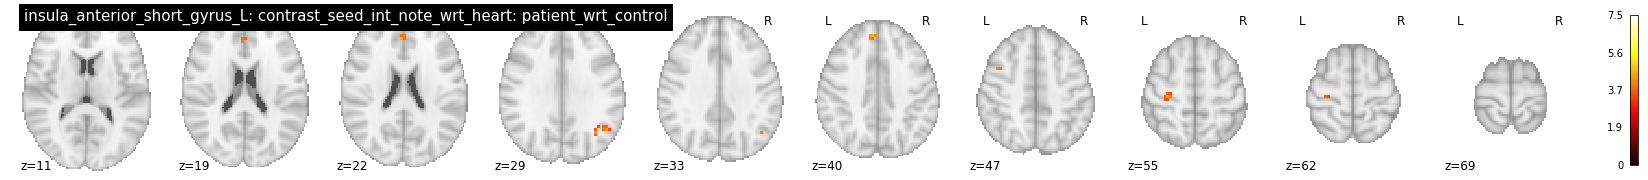

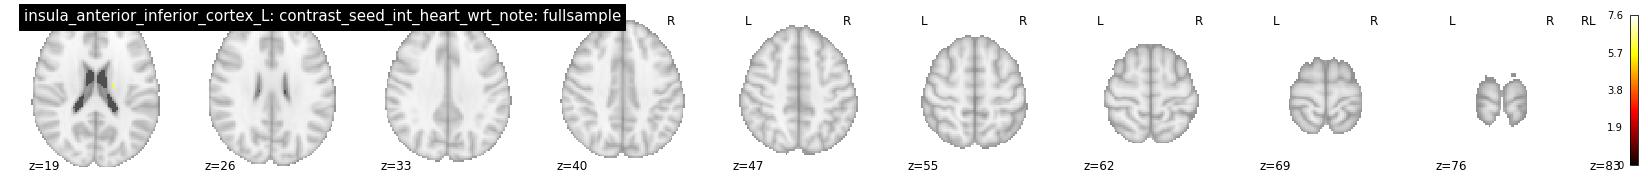

In [35]:
p = 0.05
nii_dir = Path("./glm_niftis")
seed_dir = Path("../references/insular_masks")

for c in list(nii_dir.glob("FSL_PPI/FSL_PPI-insula*/*")):
    seed_name = str(c.parent).split("-")[-1]
    contrast_name = c.name
    if "seed_int" in contrast_name:
        for g in ["fullsample", "control", "patient", "control_wrt_patients", "patient_wrt_control",]:
            tstat = f"{str(c)}/{g}_tstat.nii.gz"
            tfce = f"{str(c)}/{g}_tfce_corrp_tstat.nii.gz"
            title = ": ".join([seed_name, contrast_name, g])        

            tfce_nii = nb.load(tfce)
            mask = tfce_nii.get_fdata() > (1 - p)
            sig = tfce_nii.get_fdata().max()
            vmax = nb.load(tstat).get_fdata().max()
            data = nb.load(tstat).get_fdata() * mask
            if mask.sum() > 0: # only plot real values
                sig_tstat = nb.Nifti1Image(data, 
                                           header=tfce_nii.header, 
                                           affine=tfce_nii.affine)
                fig = plotting.plot_stat_map(sig_tstat, vmax=vmax+2, 
                                             display_mode="z", cut_coords=10, 
                                             draw_cross=False, title=title)